In [13]:
import litebird_sim as lbs
import numpy as np
import astropy.units as u
import healpy 
import pysm3
import matplotlib.pyplot as plt
import astropy.io as astroio
from copy import copy

In [14]:
imo_version='v2'

def path_det(telescope,channel_name,det_name):
    return("/releases/"+imo_version+"/satellite/"+telescope+"/"+channel_name+"/"+det_name+"/detector_info")
def path_ch(telescope,channel_name):
    return("/releases/"+imo_version+"/satellite/"+telescope+"/"+channel_name+"/channel_info")
def path_inst(telescope):
    return("/releases/"+imo_version+"/satellite/"+telescope+"/instrument_info")



imo=lbs.Imo(flatfile_location='/home/ecugenia/litebird/Crosstalk-and-LC_chip/IMO_V2/IMO_V2')
#imo = Instrument('/home/ecugenia/litebird/Crosstalk-and-LC_chip/IMo_LiteBIRD/schema.json', 'v2.1')
sec_per_day=24*60*60
nside=128
ndays=365

In [15]:
LFT=lbs.InstrumentInfo.from_imo(url=path_inst('LFT'),imo=imo)
MFT=lbs.InstrumentInfo.from_imo(url=path_inst('MFT'),imo=imo)
HFT=lbs.InstrumentInfo.from_imo(url=path_inst('HFT'),imo=imo)

LFT.channel_names  

['L1-040',
 'L2-050',
 'L1-060',
 'L3-068',
 'L2-068',
 'L4-078',
 'L1-078',
 'L3-089',
 'L2-089',
 'L4-100',
 'L3-119',
 'L4-140']

In [16]:
#Read Crosstalk matrix
def create_submatrix(matrix,d,dnames):
    
    N2=np.size(dnames)
    array=np.zeros(N2)
    for i,key in enumerate(dnames):
        array[i]=int(d[dnames[i]])
    newmatrix=np.zeros((N2,N2))
    for i in range(N2):
        for j in range(N2):
            newmatrix[i,j]=matrix[int(array[i]),int(array[j])]
    return(newmatrix)


## Read crosstalk matrix
Xtalk1=np.loadtxt('/home/ecugenia/litebird/Crosstalk-and-LC_chip/LF12_electricalxtalk_matrix_34detectors.csv',delimiter=',', unpack=True)
Xtalk2=np.loadtxt('/home/ecugenia/litebird/Crosstalk-and-LC_chip/LF12_coilmutindxtalk_matrix_34detectors.csv',delimiter=',', unpack=True)
Xtalk3=np.loadtxt('/home/ecugenia/litebird/Crosstalk-and-LC_chip/LF12_commonimpedxtalk_matrix_34detectors.csv',delimiter=',', unpack=True)
#aa=np.loadtxt('Crosstalk/LF12_sortedbymuxfrequency.csv',delimiter=',',unpack=True)
det_tab=astroio.ascii.read('/home/ecugenia/litebird/simulations/det_list_squid0.csv')
#Xtalk=np.eye(34)+(Xtalk1-np.eye(34))+(Xtalk3-np.eye(34))+(Xtalk2-np.eye(34))
Xtalk=Xtalk3
#print(tab)
#print(tab['frequency']) 
class Detector:
    def __init__(self, name, frequency, pixel, pol):
        self.name=name
        self.frequency=frequency
        self.pixel=pixel
        self.pol=pol

det_list={}
for i in range(np.size(det_tab['frequency'])):
    #det=Detector('det'+str(i), det_tab['frequency'][i],det_tab['pixel'][i],det_tab['pol'][i])
    #det_list[det.name]=i      
    det=Detector(det_tab['name'][i], det_tab['frequency'][i],det_tab['pixel'][i],det_tab['pol'][i])
    det_list[str(det.name)]=i      

#print(det_tab[:][3])
#plt.imshow(Xtalk-np.eye(34))
#plt.colorbar()
#plt.title('Xtalk-Id')

In [17]:
#Define detectors
nndet=0
samp_rate=1.
det1=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])

nndet=3
det2=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])

nndet=4
det3=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=5
det4=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=2
det5=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=6
det6=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=13
det7=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=1
det8=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=15
det9=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])
nndet=16
det10=lbs.DetectorInfo(name=det_tab['name'][nndet],
                     bandcenter_ghz=np.float64(det_tab['frequency'][nndet]),
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=1.,
                     pol=det_tab['pol'][nndet])


In [18]:

#=====================================================================
#   Definition of two detectors whose orientation  can be rotated
#   by an arbitrary angle theta_dummy

theta_dummy=np.pi/4.
NET_DET=114.63
dummy_det1=lbs.DetectorInfo(name="000_000_006_UA_040_T",
                     bandcenter_ghz=40.0,
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=NET_DET,
                     pol="T",
                     orient="U",
                     quat=[0.,0.,0.,1.])

dummy_det2=lbs.DetectorInfo(name="000_000_006_UA_040_B",
                     bandcenter_ghz=40.0,
                     bandwidth_ghz=12.1,
                     sampling_rate_hz=samp_rate,
                     net_ukrts=NET_DET,
                     pol="B",
                     orient="U",
                     quat=lbs.quat_rotation_z(theta_dummy))



det_imo: 000_000_003_QA_040_T
[[ 1.          0.00584528]
 [-0.00551194  1.        ]]


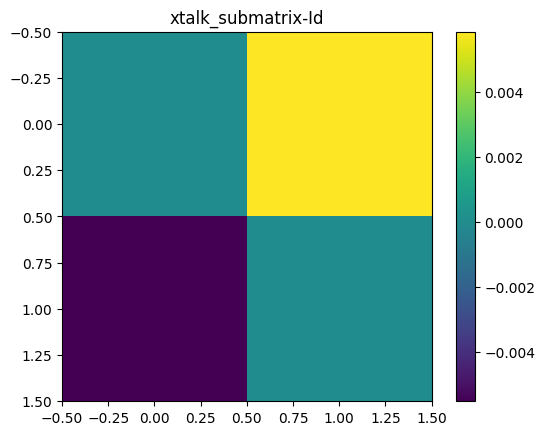

In [19]:
#====================================================================
# Read detectors from the Imo and change the sampling frequency

nnlist=[0,1,2,3,4,5,6]
SAMP_RATE=1.0
det_imo=[]
for i in nnlist:
    det_imo.append(lbs.DetectorInfo.from_imo(imo=imo,
                                         url=path_det('LFT',det_tab['channel'][i],det_tab['name'][i])))
    det_imo[i].sampling_rate_hz=SAMP_RATE
det_imo[2].name
#==========================================================================
print(f'det_imo: {det_imo[4].name}')
#detector_list=[dummy_det1,dummy_det2]
detector_list=[det_imo[3],det_imo[4]]
#detector_list=[det2,det1]

Ndet=np.size(detector_list)


#####################
#Create Simulation
sim=lbs.Simulation(base_path='./2det',
                   #start_time=Time('2023-01-01'),
                   start_time=0*80*sec_per_day,
                   duration_s=ndays*sec_per_day, 
                   random_seed=12345)
#print(det1.pol)

#############################################
#Get Crosstalk matrix for these detectors

MXtalk=create_submatrix(Xtalk,det_list,[detector_list[i].name for i in range(np.size(detector_list))])



'''
plt.imshow(Xtalk-np.eye(34))
plt.colorbar()
plt.title('Xtalk-Id')
'''
plt.imshow(MXtalk-np.eye(2))
plt.colorbar()
plt.title('xtalk_submatrix-Id')
plt.savefig('submatrix_2detectors.png')
fig_Xtalk_matrix=plt.gcf()
sim.append_to_report(
"""Here is the Crosstalk matrix
    ![](fig_Xtalk.png)""",
    figures=[(fig_Xtalk_matrix,'fig_Xtalk.png')]
)    

print(MXtalk)

In [20]:
print(MXtalk)

[[ 1.          0.00584528]
 [-0.00551194  1.        ]]


In [21]:
#Create Observation
obs,=sim.create_observations(detectors=detector_list)
#obs,=sim.create_observations(detectors=detector_list,
 #                            n_blocks_time=4,
  #                           split_list_over_processes=False)

sim.set_instrument(LFT)


#Scanning Strategy
#Parameters used taken from the Litebird_sim documentation.
#This is the scanning strategy used for CORE which is qaulitatively the same as that proposed 
#for litebird

#sim.set_scanning_strategy(scanning_strategy=
#                          lbs.SpinningScanningStrategy(
#                          spin_sun_angle_rad=np.deg2rad(30),
#                          spin_rate_hz=0.5/60,
                          #spin_rate_hz=20*1. / (4*sec_per_day),
#                          precession_rate_hz=1. / (4*sec_per_day)  
#                          )
#                         )

#Scanning stretegy from Imo
sim.set_scanning_strategy(scanning_strategy=
                          lbs.SpinningScanningStrategy(
                          spin_sun_angle_rad=np.deg2rad(45),
                          spin_rate_hz=0.25/100,#spin_rate_hz=20*1. / (4*sec_per_day),
                          precession_rate_hz=0.312/1200  
                          )
                         )

                                  



#compute pointings
#sim.compute_pointings()

#pointings=obs.pointings


sim.prepare_pointings()
#sim.precompute_pointings()
pointings,_ =obs.get_pointings()

print(np.shape(pointings))


(2, 31536000, 3)


nside=128


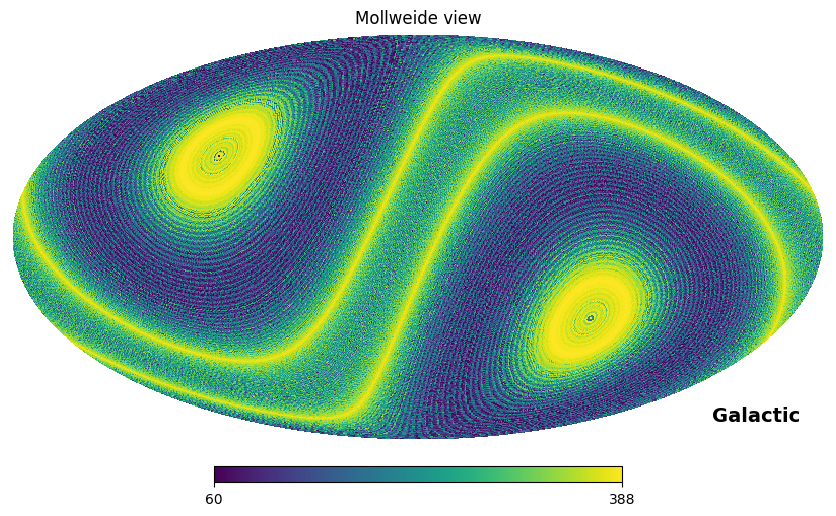

In [22]:
#visualizzare scanning strategy 
print(f'nside={nside}')
pixid=healpy.ang2pix(nside,pointings[0,:,0],pointings[0,:,1])
m=np.zeros(healpy.nside2npix(nside=nside))
#m[pixid]=1
for i in pixid:
    m[i]=m[i]+1

healpy.mollview(m,norm='hist',coord=['E','G'])
fig_coverage=plt.gcf()

sim.append_to_report(
"""Here is the Coverage map for this simulation
    ![](fig_coverage.png)""",
    figures=[(fig_coverage,'fig_coverage.png')]
)    


#healpy.mollview(m,coord=['E','G'])
#sim.compute_pos_and_vel()
#sim.add_dipole()

[2024-11-06 18:17:14,827 INFO MPI#0000] generating and saving fg simulations
[2024-11-06 18:17:14,829 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-11-06 18:17:14,833 INFO MPI#0000] NSIDE = 512
[2024-11-06 18:17:14,834 INFO MPI#0000] ORDERING = RING in fits file
[2024-11-06 18:17:14,835 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-11-06 18:17:14,985 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-11-06 18:17:14,988 INFO MPI#0000] NSIDE = 512
[2024-11-06 18:17:14,989 INFO MPI#0000] ORDERING = RING in fits file
[2024-11-06 18:17:14,990 INFO MPI#0000] INDXSCHM = IMPLICIT


nside=128


[2024-11-06 18:17:15,119 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-11-06 18:17:15,122 INFO MPI#0000] NSIDE = 512
[2024-11-06 18:17:15,123 INFO MPI#0000] ORDERING = RING in fits file
[2024-11-06 18:17:15,124 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-11-06 18:17:15,235 INFO MPI#0000] Retrieve data for pysm_2/synch_beta.fits (if not cached already)
[2024-11-06 18:17:15,238 INFO MPI#0000] NSIDE = 512
[2024-11-06 18:17:15,238 INFO MPI#0000] ORDERING = RING in fits file
[2024-11-06 18:17:15,239 INFO MPI#0000] INDXSCHM = IMPLICIT


<Figure size 640x480 with 0 Axes>

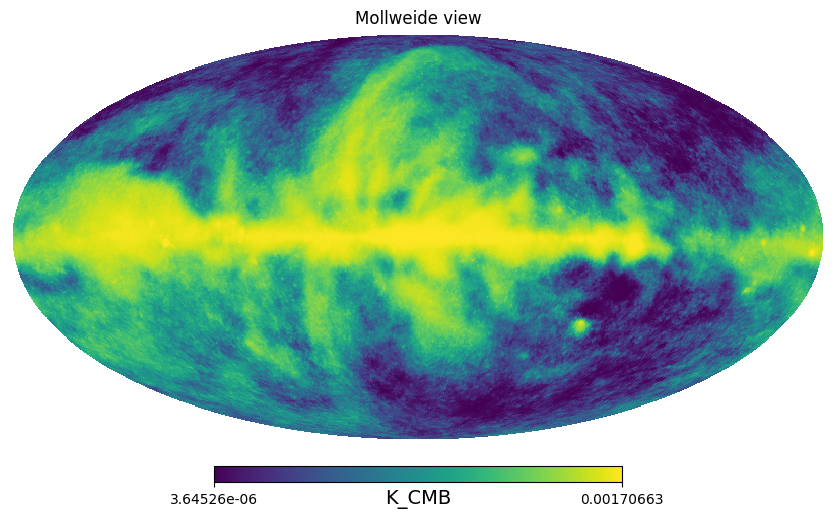

In [23]:
#Define an input map
print(f'nside={nside}')
map_par=lbs.MbsParameters(nside=nside, make_cmb=False, make_fg=True,make_dipole=False,
                          #fg_models=['pysm_dust_1','pysm_synch_1','pysm_ame_1','pysm_freefree_1'])
                          fg_models=['pysm_synch_1'])

#map_par2=lbs.MbsParameters(nside=nside, make_cmb=False, make_fg=True,make_dipole=False,
                          #fg_models=['pysm_dust_1','pysm_synch_1','pysm_ame_1','pysm_freefree_1'])
 #                         fg_models=['pysm_synch_1'])


map_in_obj=lbs.Mbs(simulation=sim, parameters=map_par,detector_list=detector_list)
map_in=map_in_obj.run_all()[0]

#map_in_obj2=lbs.Mbs(simulation=sim, parameters=map_par2,detector_list=detector_list)
#map_in2=map_in_obj2.run_all()[0]


# visualize map

plt.figure()
healpy.mollview(map_in[detector_list[0].name][0],
               norm='hist', unit='K_CMB')
figI=plt.gcf()
plt.savefig('input map 40 GHz')
#healpy.mollview(map_in[detector_list[0].name][1],unit='K_CMB')
#print(detector_list[0].name)


#figI_full=plt.gcf()

sim.append_to_report(
   """Here is the input map in the 40 GHz channel
    ![](figI.png)""",
    figures=[(figI,'figI.png')]
)    


(2, 31536000)
2
detector_list: 000_000_006_UA_040_T
detector_list: 000_000_003_QA_040_T
(2, 31536000)


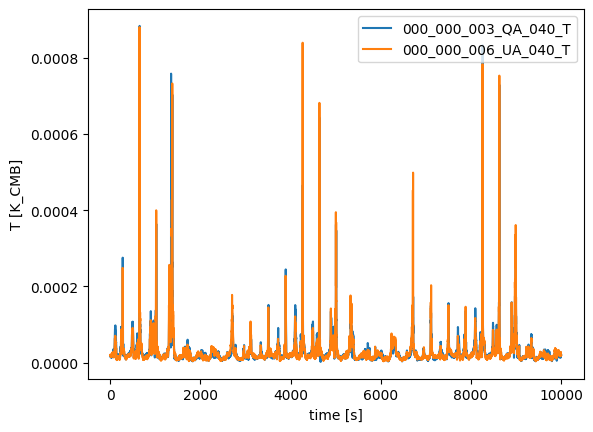

In [24]:
#Scan map into ToDs
times=obs.get_times()
lbs.scan_map_in_observations(observations=obs,
                            maps=map_in)
print(np.shape(obs.tod))
print(np.size(obs.tod[:,0]))
for i in range(len(detector_list)):
    print(f'detector_list: {detector_list[i].name}')
print(np.shape(obs.tod))
time_end=10000
ndet=2
ndet2=1
nstep=1
plt.figure()
plt.plot(times[:time_end:nstep],obs.tod[ndet-1,:time_end:nstep], label=detector_list[ndet-1].name)
plt.plot(times[:time_end:nstep],obs.tod[ndet-2,:time_end:nstep], label=detector_list[ndet-2].name)
#plt.plot(times[::nstep],obs.tod[ndet2-1,::nstep], label=detector_list[ndet2-1].name)
plt.xlabel('time [s]')
plt.ylabel('T [K_CMB]')    
plt.legend()
plt.savefig('TODs_wo_xtalk.png')
fig_tod=plt.gcf()

sim.append_to_report(
   """Here we can see the Time Ordeed Data (TOD) for two representative frequency channels of the LFT telescope.
        The peaks correnspond to galactic emission.
    ![](fig_tod.png)""",
    figures=[(fig_tod,'fig_tod.png')]
)    



In [25]:
#Generate Crosstalk TODS

#Crosstalked tod
ntods=Ndet
Nsample=np.size(times)
tod_X=np.zeros((ntods,Nsample))
#tod1=obs.tod[0]
#tod2=obs.tod[1]
  
    
    
tod_X=MXtalk.dot([obs.tod[i] for i in range(np.size(detector_list))])    
#for i in range(Nsample):
 #   tod_X[:,i]=np.matmul(MXtalk,[obs.tod[i] for i in range(np.size(detector_list))])
    #tod_X[:,i]=np.matmul(MXtalk,[tod1[i],tod2[i],tod3[i],tod4[i]])
#Plot results
print(f'tod_X: {tod_X}')

tod_X: [[1.95978702e-05 2.01351777e-05 1.93656095e-05 ... 2.22253516e-05
  1.81697340e-05 1.76870482e-05]
 [1.77940804e-05 1.69212919e-05 1.64996145e-05 ... 1.50513606e-05
  1.78896522e-05 2.28035659e-05]]


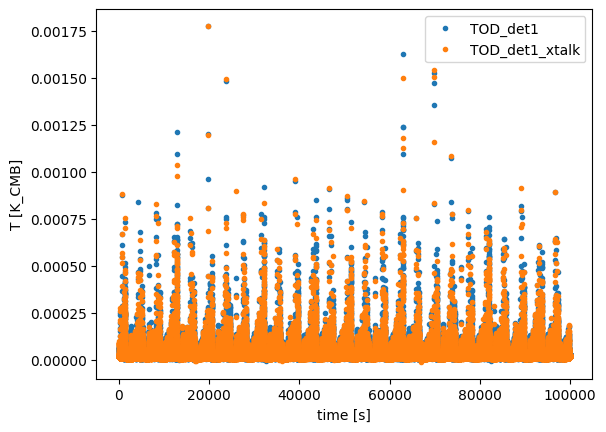

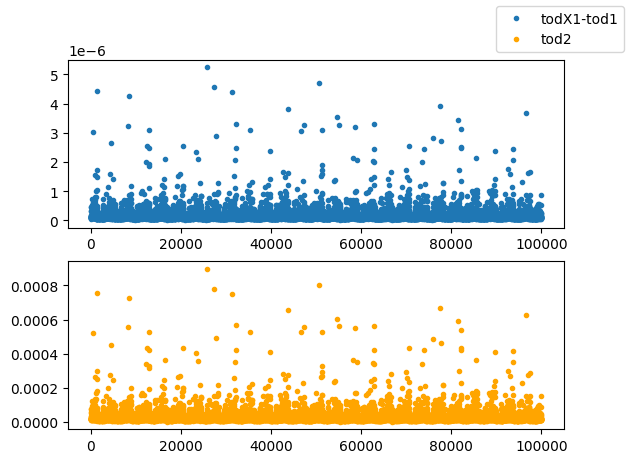

In [ ]:
################################################
#PLOT TODS


nstep=1
nend=100000
#nend=np.size(times)
plt.figure() #create an empty figure
plt.plot(times[:nend:nstep],obs.tod[1][:nend:nstep],'.',label='TOD_det1')
#plt.plot(times[::10],tod3[::10],'.',label='tod2')
plt.plot(times[:nend:nstep],tod_X[0,:nend:nstep],'.',label='TOD_det1_xtalk')
#plt.plot(times,tod_X[2],'.',label='todX 2')
plt.xlabel('time [s]')
plt.ylabel('T [K_CMB]')
plt.legend()
plt.savefig('TOD_det1_xtalk.png')
fig_tod_xtalk=plt.gcf()
sim.append_to_report(
    """Here we can see the TOD for the simulation, with and without crosstalk
    ![](fig_tod_xtalk.png)""",
    figures=[(fig_tod_xtalk,'fig_tod_xtalk.png')]
)

###################################################
#print the difference with and without crosstalk
nstep=10
nend=100000
#nend=np.size(times)
fig,(ax1,ax2)=plt.subplots(2)
ax1.plot(times[:nend:nstep],tod_X[0,:nend:nstep]-obs.tod[0,:nend:nstep],'.',label='todX1-tod1')
ax2.plot(times[:nend:nstep],obs.tod[1,:nend:nstep],'.',color='orange',label='tod2')
fig.legend()
fig_tod_diff=fig
sim.append_to_report(
    """Residual Crosstalk TOD
    ![](fig_tod_diff.png)""",
    figures=[(fig_tod_diff,'fig_tod_diff.png')]
)



[9.48621346e-06 9.56935491e-06 1.11632080e-05]


<Figure size 640x480 with 0 Axes>

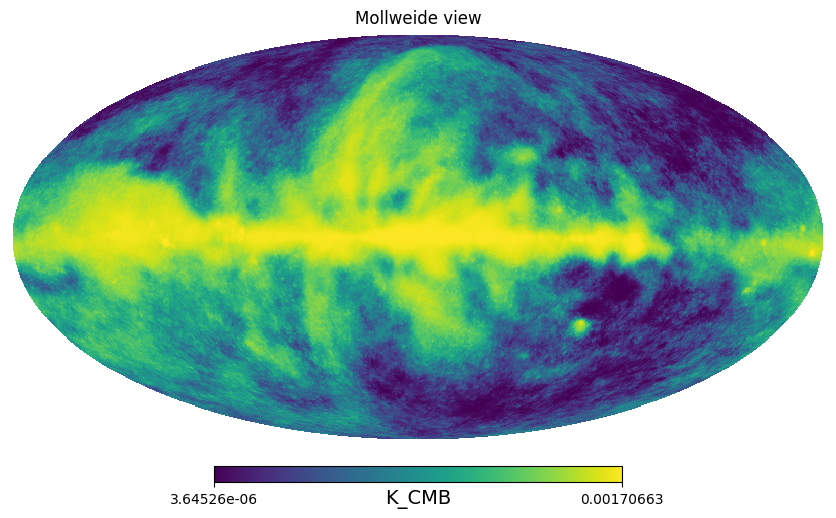

<Figure size 640x480 with 0 Axes>

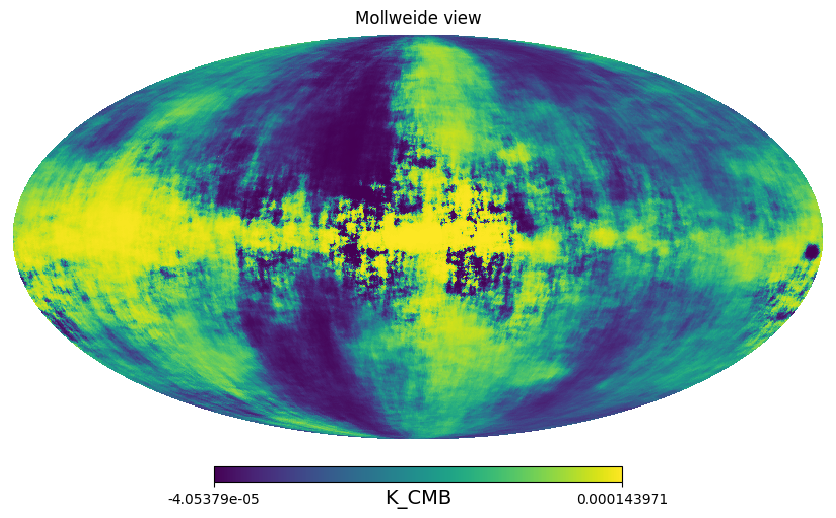

<Figure size 640x480 with 0 Axes>

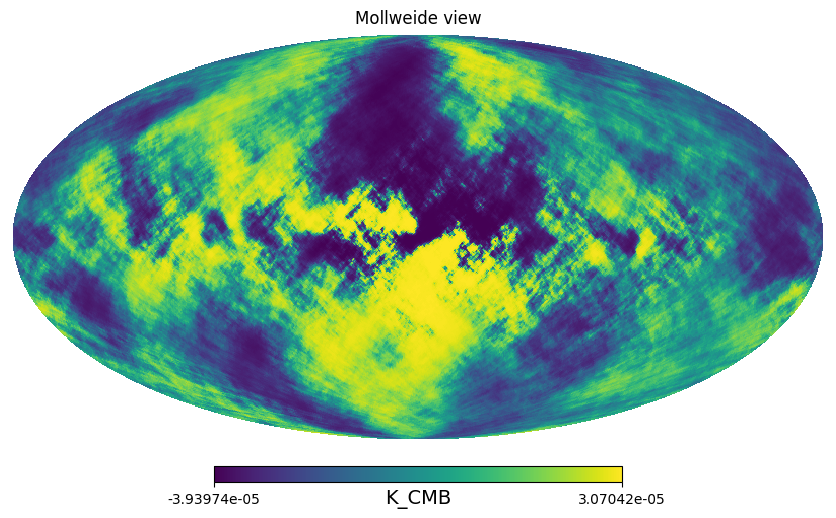

In [ ]:
#Create an Observation with the crosstalked TODs
#obsX,=sim.create_observations(detectors=detector_list)
#obsX,=sim.create_observations(detectors=detector_list,
 #                             n_blocks_time=4,
  #                            split_list_over_processes=False)

#Scanning stretegy from Imo
#sim.set_scanning_strategy(scanning_strategy=
#                          lbs.SpinningScanningStrategy(
 #                         spin_sun_angle_rad=np.deg2rad(45),
  #                        spin_rate_hz=0.25/100,#spin_rate_hz=20*1. / (4*sec_per_day),
   #                       precession_rate_hz=0.312/1200  
    #                      )
     #                    )

                                  



#compute pointings
#sim.compute_pointings()
obsX=copy(obs)

obsX.tod=tod_X[:]

##########################################
### Recover the sky map with the binned map making
result=lbs.make_binned_map(nside=nside,observations=obs)


##############################################
# Visualize the recovered Map
plt.figure()
healpy.mollview(result.binned_map[0],norm='hist',unit='K_CMB')
fig_outmap=plt.gcf()

plt.figure()
healpy.mollview(result.binned_map[1],norm='hist',unit='K_CMB')
fig_outmap2=plt.gcf()

plt.figure()
healpy.mollview(result.binned_map[2],norm='hist',unit='K_CMB')
fig_outmap3=plt.gcf()


print(result.binned_map[0][0:3])

sim.append_to_report(
   """Finalluy here we can see the reconstructed maps.
    ![](fig_outmap.png)
    ![](fig_outmap2.png)
    ![](fig_outmap3.png)""",
    figures=[(fig_outmap,'fig_outmap.png'),
             (fig_outmap2,'fig_outmap2.png'),
             (fig_outmap3,'fig_outmap3.png')]
)    






nside: 128
Residual maps


<Figure size 640x480 with 0 Axes>

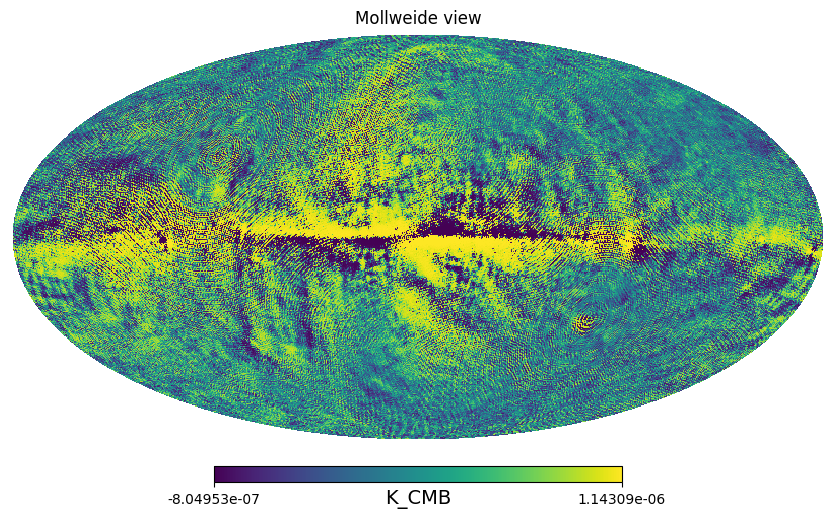

<Figure size 640x480 with 0 Axes>

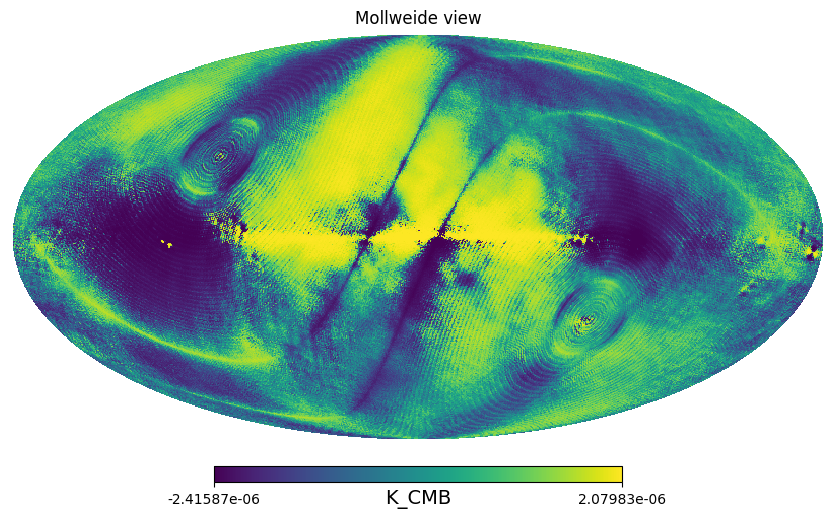

<Figure size 640x480 with 0 Axes>

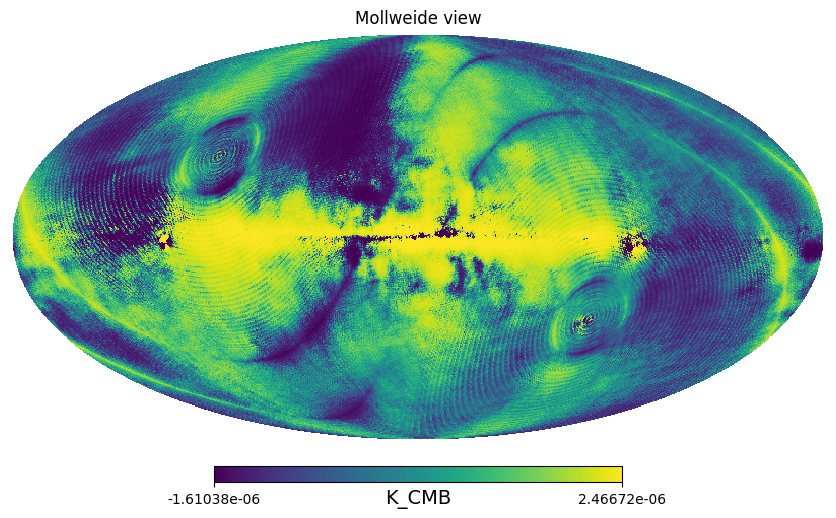

In [ ]:
####################################################
### Recover the Xtalk sky map with the binned map making
resultX=lbs.make_binned_map(nside=nside,observations=obsX)
print(f'nside: {nside}')
#healpy.mollview(resultX.binned_map[0]-map_in2[detector_list[0].name][0],norm='hist',unit='K_CMB')
print('Residual maps')
plt.figure()
healpy.mollview(resultX.binned_map[0]-result.binned_map[0],norm='hist',unit='K_CMB')
fig_outmap_res=plt.gcf()


plt.figure()
healpy.mollview(resultX.binned_map[1]-result.binned_map[1],norm='hist',unit='K_CMB')
#healpy.mollview(resultX.binned_map[1],norm='hist',unit='K_CMB')
fig_outmap2_res=plt.gcf()

plt.figure()
healpy.mollview(resultX.binned_map[2]-result.binned_map[2],norm='hist',unit='K_CMB')
#healpy.mollview(resultX.binned_map[1],norm='hist',unit='K_CMB')
fig_outmap3_res=plt.gcf()



#print(result.binned_map[0][0:3])

sim.append_to_report(
   """Finalluy here we can see the reconstructed maps for the crosstalk residual .
    ![](fig_outmap_res.png)
    ![](fig_outmap2_res.png)
    ![](fig_outmap3_res.png)""",
    figures=[(fig_outmap_res,'fig_outmap_res.png'),
             (fig_outmap2_res,'fig_outmap2_res.png'),
             (fig_outmap3_res,'fig_outmap3_res.png')]
)    


In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Compute the map of the crosstalk residual for the tod of only 
# one detector
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


obs_1det,=sim.create_observations(detectors=[detector_list[0]])
sim.prepare_pointings()
obs_1det.get_pointings()
#lbs.scan_map_in_observations(obs_1det,
 #                           maps=map_in)

obs_1det.tod=np.array([tod_X[0]-obs.tod[0]])
result1d=lbs.make_binned_map(nside=nside,observations=obs_1det)

#healpy.mollview(result.binned_map[1],norm='hist',unit='K_CMB')
plt.figure()
healpy.mollview(result1d.binned_map[1],norm='hist',unit='K_CMB')
fig_out_1det_resQ=plt.gcf()
#healpy.mollview(result.binned_map[2],norm='hist',unit='K_CMB')
plt.figure()
healpy.mollview(result1d.binned_map[2],norm='hist',unit='K_CMB')
fig_out_1det_resU=plt.gcf()

sim.append_to_report(
   """Finalluy here we can see the reconstructed maps for the crosstalk residual from the TOD of the first detector only.
    ![](fig_out_1det_resQ.png)
    ![](fig_out_1det_resU.png)""",
    figures=[(fig_out_1det_resQ,'fig_out_1det_resQ.png'),(fig_out_1det_resU,'fig_out_1det_resU.png')]
)    


KeyboardInterrupt: 

/tmp/ipykernel_489/4107119221.py:32: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1.5e3)
/tmp/ipykernel_489/4107119221.py:46: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1.5e3)
/tmp/ipykernel_489/4107119221.py:61: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1.5e3)


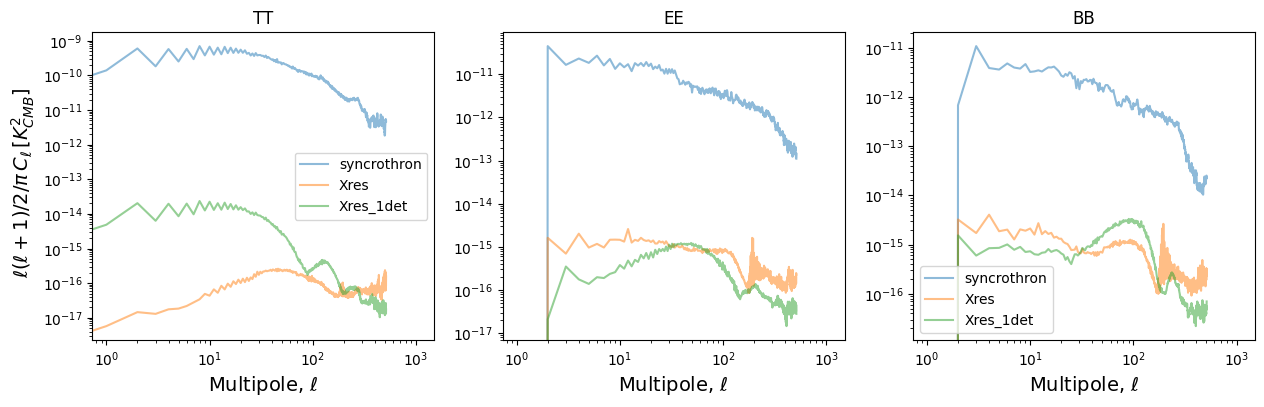

In [ ]:
#+===========================================================================
#============================================================================
### Compute $C_l$
#
#=============================================================================

Nside=128
lmax=4*Nside
stokes= "IQU"

Cl=healpy.anafast(result.binned_map , lmax=lmax )
ClX=healpy.anafast(resultX.binned_map-result.binned_map , lmax=lmax )
CLX1det=healpy.anafast(result1d.binned_map , lmax=lmax )

#ClX_CMB=hp.anafast(mapX_CMB , lmax=lmax )



ells = np.arange(lmax+1)


plt.figure(figsize=(15,4))
plt.subplot(131)

plt.title('TT')
plt.loglog(ells, Cl[0,:]*ells*(ells+1)/2./np.pi , label = 'syncrothron',alpha=.5)
plt.loglog(ells, ClX[0,:]*ells*(ells+1)/2./np.pi , label = 'Xres',alpha=.5)
plt.loglog(ells, CLX1det[0,:]*ells*(ells+1)/2./np.pi , label = 'Xres_1det',alpha=.5)


#plt.ylim(1e-11,1e-8)
plt.xlim(0,1.5e3)

plt.legend()
plt.ylabel(" $\ell(\ell+1)/2/\pi\, C_{\ell}\,  [ K^2_{CMB}]$" , fontsize=14)
plt.xlabel("Multipole, "+r"$\ell$" , fontsize=14)

plt.subplot(132)
plt.title('EE')
plt.loglog(ells, Cl[1,:]*ells*(ells+1)/2./np.pi , label = 'syncrothron',alpha=.5)
plt.loglog(ells, ClX[1,:]*ells*(ells+1)/2./np.pi , label = 'Xres',alpha=.5)
plt.loglog(ells, CLX1det[1,:]*ells*(ells+1)/2./np.pi , label = 'Xres_1det',alpha=.5)



plt.xlim(0,1.5e3)


plt.xlabel("Multipole, "+r"$\ell$" , fontsize=14)

plt.subplot(133)
plt.title('BB')
plt.loglog(ells, Cl[2,:]*ells*(ells+1)/2./np.pi , label = 'syncrothron',alpha=.5)
plt.loglog(ells, ClX[2,:]*ells*(ells+1)/2./np.pi , label = 'Xres',alpha=.5)
plt.loglog(ells, CLX1det[2,:]*ells*(ells+1)/2./np.pi , label = 'Xres_1det',alpha=.5)

#plt.plot(ells, Cl[2,:]*ells*(ells+1)/2./np.pi , label = '',alpha=.5)
#plt.plot(ells, ClX[2,:]*ells*(ells+1)/2./np.pi , label = 'Xres',alpha=.5)


plt.xlim(0,1.5e3)


plt.xlabel("Multipole, "+r"$\ell$" , fontsize=14)
plt.legend()
fig_spectra=plt.gcf()

sim.append_to_report(
   """Finalluy here we can see the reconstructed maps for the crosstalk residual .
    ![](fig_spectra.png)""",
    figures=[(fig_spectra,'fig_spectra.png')]
)    


In [ ]:
#aggiungere altre forme di xtalk

In [ ]:
#===================================================
# UNNECESSARY PART
# This part is for a test I was doing, not necessary
from scipy.integrate import trapezoid

I=trapezoid(Cl[2,:]*ells*(ells+1)/2./np.pi,ells)
IX=trapezoid(ClX[2,:]*ells*(ells+1)/2./np.pi,ells)
I=np.log10(I)
IX=np.log10(IX)
Mcl=np.log10(np.mean(Cl[2,:]*ells*(ells+1)/2./np.pi))
MclX=np.log10(np.mean(ClX[2,:]*ells*(ells+1)/2./np.pi))
print(I,IX,np.abs(I-IX))
print(Mcl,MclX,np.abs(Mcl-MclX))
#===========================================
# END OF THE UNNECESSARY PART
#================================================

filename='ClX_Synch_40GHz_2det_pi4.dat'
fo=open(filename,'w')
for i in range(lmax+1):
        YY=CLX1det[0,i]*ells[i]*(ells[i]+1)/2./np.pi
        YY1=CLX1det[1,i]*ells[i]*(ells[i]+1)/2./np.pi
        YY2=CLX1det[2,i]*ells[i]*(ells[i]+1)/2./np.pi
        fo.write(str(ells[i])+'\t'+str(YY)+'\t'+str(YY1)+'\t'+str(YY2)+'\n')
fo.close()
sim.flush()

[2024-11-06 10:43:32,690 INFO MPI#0000] Profile data saved to file "/home/ecugenia/litebird/simulations/2det/profile_mpi00000.json"
[2024-11-06 10:43:32,747 WARNING MPI#0000] unable to save information about latest git commit in the report: not enough values to unpack (expected 4, got 1)


-9.56505576480464 -12.634466841975406 3.0694110771707663
-12.275154513198988 -15.344350247472251 3.069195734273263


PosixPath('2det/report.html')